## Problem Statement :
###                                        Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df


### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.decomposition import PCA

### Import Data

In [2]:
wine_data = pd.read_csv("wine.csv")
wine_data

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [3]:
wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [4]:
wine_data.tail()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
173           0.52             1.06    7.7  0.64      1.74      740  
174           0.43             1.41    7.3  0.70      1.56      750  
175           0.43             1.35   10.2  0.59      1.56      835  
176           0.53             1.46    9.3  0.60      1.62      840  
177           0.56             1.35    9.2  0.61      1.60      560

### Data Understanding

In [5]:
wine_data.shape

(178, 14)

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
wine_data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
wine_data.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [9]:
wine_data.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [10]:
wine_data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

### Correlation

In [11]:
corr = wine_data.corr()
corr

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

In [12]:
corr.style.background_gradient(cmap='coolwarm')

### There are some correlations between variables. For example the correlation between flavanoids and Dilution is pretty high (78%). Thus we can remove that variable from our dataset. However this method is long and tedious. Hence we use PCA method for Dimensionality Reduction.

---
### Dimensionality Reduction with PCA

In [13]:
wine_data_norm = StandardScaler().fit_transform(wine_data) # normalizing the data

In [14]:
wine_data_norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [15]:
pca = PCA(n_components=13)
pca

PCA(n_components=13)

In [16]:
wine_pca=pca.fit_transform(wine_data_norm)
wine_pca

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
        -4.20493905e-01,  5.52927766e-01, -3.02978176e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
        -1.30019629e-01,  3.94971160e-01, -1.46645308e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
        -2.79074108e-01,  1.89799314e-03,  2.12780166e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         5.02640272e-01,  6.93336340e-01,  1.67035660e-01],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.13785741e-01,  3.44119826e-01, -1.09514873e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -2.38282390e-01, -1.89866131e-01, -1.64090011e-01]])

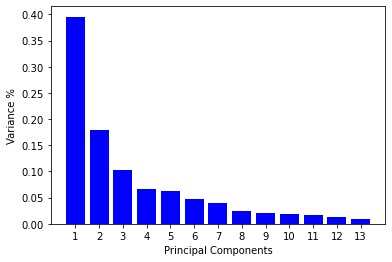

In [17]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)
plt.show()

In [18]:
# PCA Components matrix or covariance Matrix
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [19]:
# The amount of variance that each PCA has
var= pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458])

In [20]:
# Cummulative variance of each PCA
var_cum = np.cumsum(np.round(var,4)*100)
var_cum

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85, 97.46, 98.67, 99.6 ])

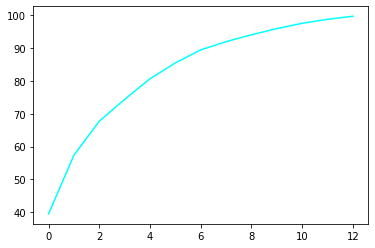

In [21]:
# Variance plot for PCA components obtained 
plt.plot(var_cum,color='cyan')
plt.show()

In [22]:
# Final Dataframe
final_df = pd.concat([wine_data['Type'],pd.DataFrame(wine_pca[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df

Type       PC1       PC2       PC3
0       1 -3.522934 -1.453098 -0.164795
1       1 -2.528858  0.330019 -2.026707
2       1 -2.785029 -1.036936  0.983238
3       1 -3.922588 -2.768210 -0.174968
4       1 -1.407511 -0.867773  2.025829
..    ...       ...       ...       ...
173     3  3.627996 -2.206617 -0.343668
174     3  2.942729 -1.752263  0.207480
175     3  3.027272 -2.756040 -0.940803
176     3  2.755222 -2.293784 -0.550474
177     3  3.496336 -2.760608  1.013151

[178 rows x 4 columns]

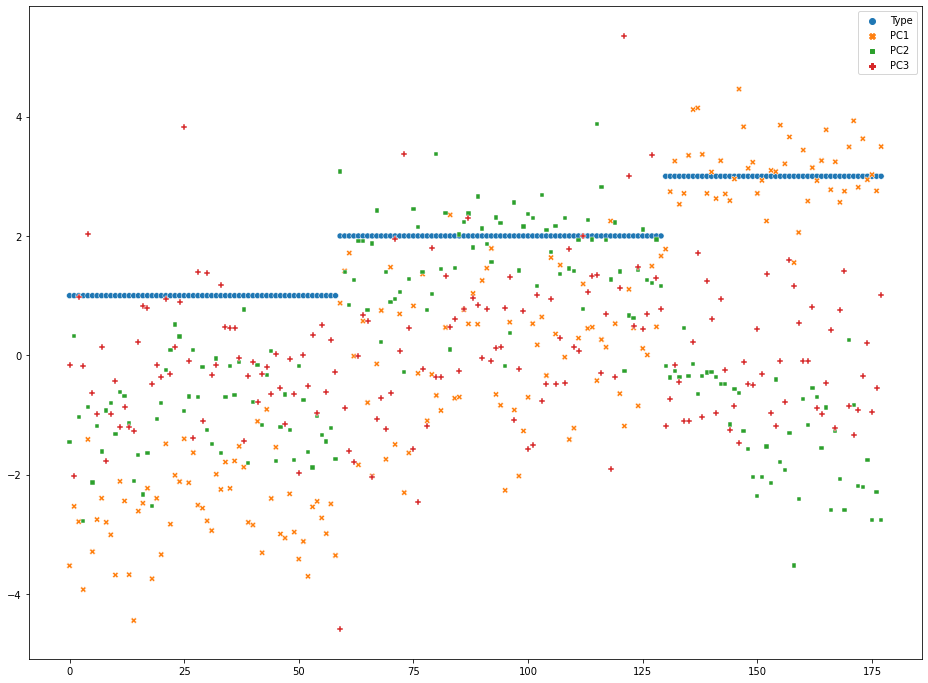

In [23]:
# Visualization of PCAs
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=final_df)
plt.show()

### Clustering Algorithms :

### 1. Hierarchical Clustering 

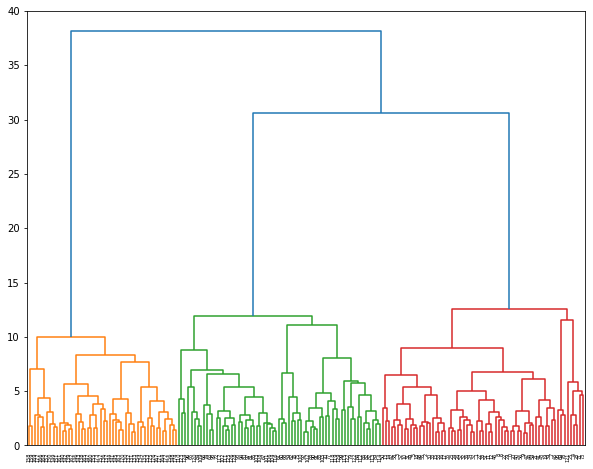

In [24]:
# As we already have normalized data, create Dendrograms
plt.figure(figsize=(10,8))
dgm = sch.dendrogram(sch.linkage(wine_data_norm,'ward'))

In [25]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=3)

In [26]:
y=pd.DataFrame(hclusters.fit_predict(wine_data_norm),columns=['h_clusters'])
y['h_clusters'].value_counts()

0    65
2    65
1    48
Name: h_clusters, dtype: int64

In [27]:
# Adding clusters to dataset
wine_hc = wine_data.copy()
wine_hc['h_clusters'] = hclusters.labels_
wine_hc

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52             1.06   7.70  0.64      1.74      740   
174           0.43             1.41   7.30  0.70      1.56      750   
175           0.43             1.35  10.20  0.59      1.56      835   
176           0.53             1.46   9.30  0.60      1.62      840   
177           0.56             1.35   9.20  0.61      1.60      560   

     h_clusters  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
173           1  
174           1  
175           1  
176           1  
177           1  

[178 rows x 15 columns]

In [28]:
wine_hc['h_clusters'].value_counts()

0    65
2    65
1    48
Name: h_clusters, dtype: int64

In [29]:
wine_hc[wine_hc['h_clusters']==0]

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
71      2    13.86   1.51  2.67        25.0         86     2.95        2.86   
73      2    12.99   1.67  2.60        30.0        139     3.30        2.89   
78      2    12.33   0.99  1.95        14.8        136     1.90        1.85   
95      2    12.47   1.52  2.20        19.0        162     2.50        2.27   
121     2    11.56   2.05  3.23        28.5        119     3.18        5.08   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
71            0.21             1.87   3.38  1.36      3.16      410   
73            0.21             1.96   3.35  1.31      3.50      985   
78            0.35             2.76   3.40  1.06      2.31      750   
95            0.32             3.28   2.60  1.16      2.63      937   
121           0.47             1.87   6.00  0.93      3.69      465   

     h_clusters  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
71            0  
73            0  
78            0  
95            0  
121           0  

[65 rows x 15 columns]

In [30]:
wine_hc[wine_hc['h_clusters']==1]

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
130     3    12.86   1.35  2.32        18.0        122     1.51        1.25   
131     3    12.88   2.99  2.40        20.0        104     1.30        1.22   
132     3    12.81   2.31  2.40        24.0         98     1.15        1.09   
133     3    12.70   3.55  2.36        21.5        106     1.70        1.20   
134     3    12.51   1.24  2.25        17.5         85     2.00        0.58   
135     3    12.60   2.46  2.20        18.5         94     1.62        0.66   
136     3    12.25   4.72  2.54        21.0         89     1.38        0.47   
137     3    12.53   5.51  2.64        25.0         96     1.79        0.60   
138     3    13.49   3.59  2.19        19.5         88     1.62        0.48   
139     3    12.84   2.96  2.61        24.0        101     2.32        0.60   
140     3    12.93   2.81  2.70        21.0         96     1.54        0.50   
141     3    13.36   2.56  2.35        20.0         89     1.40        0.50   
142     3    13.52   3.17  2.72        23.5         97     1.55        0.52   
143     3    13.62   4.95  2.35        20.0         92     2.00        0.80   
144     3    12.25   3.88  2.20        18.5        112     1.38        0.78   
145     3    13.16   3.57  2.15        21.0        102     1.50        0.55   
146     3    13.88   5.04  2.23        20.0         80     0.98        0.34   
147     3    12.87   4.61  2.48        21.5         86     1.70        0.65   
148     3    13.32   3.24  2.38        21.5         92     1.93        0.76   
149     3    13.08   3.90  2.36        21.5        113     1.41        1.39   
150     3    13.50   3.12  2.62        24.0        123     1.40        1.57   
151     3    12.79   2.67  2.48        22.0        112     1.48        1.36   
152     3    13.11   1.90  2.75        25.5        116     2.20        1.28   
153     3    13.23   3.30  2.28        18.5         98     1.80        0.83   
154     3    12.58   1.29  2.10        20.0        103     1.48        0.58   
155     3    13.17   5.19  2.32        22.0         93     1.74        0.63   
156     3    13.84   4.12  2.38        19.5         89     1.80        0.83   
157     3    12.45   3.03  2.64        27.0         97     1.90        0.58   
158     3    14.34   1.68  2.70        25.0         98     2.80        1.31   
159     3    13.48   1.67  2.64        22.5         89     2.60        1.10   
160     3    12.36   3.83  2.38        21.0         88     2.30        0.92   
161     3    13.69   3.26  2.54        20.0        107     1.83        0.56   
162     3    12.85   3.27  2.58        22.0        106     1.65        0.60   
163     3    12.96   3.45  2.35        18.5        106     1.39        0.70   
164     3    13.78   2.76  2.30        22.0         90     1.35        0.68   
165     3    13.73   4.36  2.26        22.5         88     1.28        0.47   
166     3    13.45   3.70  2.60        23.0        111     1.70        0.92   
167     3    12.82   3.37  2.30        19.5         88     1.48        0.66   
168     3    13.58   2.58  2.69        24.5        105     1.55        0.84   
169     3    13.40   4.60  2.86        25.0        112     1.98        0.96   
170     3    12.20   3.03  2.32        19.0         96     1.25        0.49   
171     3    12.77   2.39  2.28        19.5         86     1.39        0.51   
172     3    14.16   2.51  2.48        20.0         91     1.68        0.70   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins      Color   Hue  Dilution  Proline  \
130           0.21             0.94   4.100000  0.76      

In [31]:
wine_hc[wine_hc['h_clusters']==2]

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
59      2    12.37   0.94  1.36        10.6         88     1.98        0.57   
60      2    12.33   1.10  2.28        16.0        101     2.05        1.09   
61      2    12.64   1.36  2.02        16.8        100     2.02        1.41   
62      2    13.67   1.25  1.92        18.0         94     2.10        1.79   
63      2    12.37   1.13  2.16        19.0         87     3.50        3.10   
..    ...      ...    ...   ...         ...        ...      ...         ...   
125     2    12.07   2.16  2.17        21.0         85     2.60        2.65   
126     2    12.43   1.53  2.29        21.5         86     2.74        3.15   
127     2    11.79   2.13  2.78        28.5         92     2.13        2.24   
128     2    12.37   1.63  2.30        24.5         88     2.22        2.45   
129     2    12.04   4.30  2.38        22.0         80     2.10        1.75   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
59            0.28             0.42   1.95  1.05      1.82      520   
60            0.63             0.41   3.27  1.25      1.67      680   
61            0.53             0.62   5.75  0.98      1.59      450   
62            0.32             0.73   3.80  1.23      2.46      630   
63            0.19             1.87   4.45  1.22      2.87      420   
..             ...              ...    ...   ...       ...      ...   
125           0.37             1.35   2.76  0.86      3.28      378   
126           0.39             1.77   3.94  0.69      2.84      352   
127           0.58             1.76   3.00  0.97      2.44      466   
128           0.40             1.90   2.12  0.89      2.78      342   
129           0.42             1.35   2.60  0.79      2.57      580   

     h_clusters  
59            2  
60            2  
61            2  
62            2  
63            2  
..          ...  
125           2  
126           2  
127           2  
128           2  
129           2  

[65 rows x 15 columns]

In [32]:
wine_hc.groupby('h_clusters').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                mean       mean      mean      mean       mean        mean   
h_clusters                                                                   
0           1.092308  13.636308  1.962462  2.450462  17.527692  108.723077   
1           3.000000  13.153750  3.333750  2.437083  21.416667   99.312500   
2           2.000000  12.251846  1.973692  2.230462  20.043077   91.076923   

             Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                mean       mean          mean            mean      mean   
h_clusters                                                                
0           2.819231   2.956769      0.289385        1.943077  5.350000   
1           1.678750   0.781458      0.447500        1.153542  7.396250   
2           2.226154   2.023231      0.371077        1.561692  3.039538   

                 Hue  Dilution      Proline  
                mean      mean         mean  
h_clusters                                   
0           1.073231  3.148769  1078.338462  
1           0.682708  1.683542   629.895833  
2           1.044554  2.760000   501.846154

------

### 2. K-Means Clustering

### Finding out the optimal number of clusters
#### The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion
### Elbow Method :


In [33]:
wcssd = [] # wcss = within cluster sum of squared distance
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12121)
    kmeans.fit(wine_data_norm)
    wcssd.append(kmeans.inertia_)
wcssd

[2492.0000000000005,
 1727.2286609320033,
 1285.562258740204,
 1190.6718062345333,
 1122.529735919091,
 1051.6202797763672,
 1012.0806043700753,
 954.2261916968582,
 906.0389612887735,
 872.2351251853975]

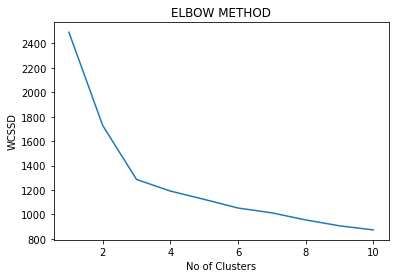

In [34]:
plt.plot(range(1,11),wcssd)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSSD')
plt.show()

### The plot levels off at 3 and let's use it to determine the clusters as K = 3
-----
### Analysing the data with number of clusters = 3


In [35]:
# Cluster algorithm using K=3
kmeans_clusters=KMeans(n_clusters= 3,random_state= 12121).fit(wine_data_norm)
kmeans_clusters

KMeans(n_clusters=3, random_state=12121)

In [36]:
kmeans_clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [37]:
# Assign clusters to the data set
wine_kmeans = wine_data.copy()
wine_kmeans['kmeans_clusters']=kmeans_clusters.labels_
wine_kmeans

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52             1.06   7.70  0.64      1.74      740   
174           0.43             1.41   7.30  0.70      1.56      750   
175           0.43             1.35  10.20  0.59      1.56      835   
176           0.53             1.46   9.30  0.60      1.62      840   
177           0.56             1.35   9.20  0.61      1.60      560   

     kmeans_clusters  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
..               ...  
173                2  
174                2  
175                2  
176                2  
177                2  

[178 rows x 15 columns]

In [38]:
wine_kmeans['kmeans_clusters'].value_counts()

0    68
1    61
2    49
Name: kmeans_clusters, dtype: int64

In [39]:
wine_kmeans[wine_kmeans['kmeans_clusters']==0]

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
59      2    12.37   0.94  1.36        10.6         88     1.98        0.57   
60      2    12.33   1.10  2.28        16.0        101     2.05        1.09   
61      2    12.64   1.36  2.02        16.8        100     2.02        1.41   
62      2    13.67   1.25  1.92        18.0         94     2.10        1.79   
63      2    12.37   1.13  2.16        19.0         87     3.50        3.10   
..    ...      ...    ...   ...         ...        ...      ...         ...   
125     2    12.07   2.16  2.17        21.0         85     2.60        2.65   
126     2    12.43   1.53  2.29        21.5         86     2.74        3.15   
127     2    11.79   2.13  2.78        28.5         92     2.13        2.24   
128     2    12.37   1.63  2.30        24.5         88     2.22        2.45   
129     2    12.04   4.30  2.38        22.0         80     2.10        1.75   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
59            0.28             0.42   1.95  1.05      1.82      520   
60            0.63             0.41   3.27  1.25      1.67      680   
61            0.53             0.62   5.75  0.98      1.59      450   
62            0.32             0.73   3.80  1.23      2.46      630   
63            0.19             1.87   4.45  1.22      2.87      420   
..             ...              ...    ...   ...       ...      ...   
125           0.37             1.35   2.76  0.86      3.28      378   
126           0.39             1.77   3.94  0.69      2.84      352   
127           0.58             1.76   3.00  0.97      2.44      466   
128           0.40             1.90   2.12  0.89      2.78      342   
129           0.42             1.35   2.60  0.79      2.57      580   

     kmeans_clusters  
59                 0  
60                 0  
61                 0  
62                 0  
63                 0  
..               ...  
125                0  
126                0  
127                0  
128                0  
129                0  

[68 rows x 15 columns]

In [40]:
wine_kmeans[wine_kmeans['kmeans_clusters']==1]

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1      1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2      1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3      1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4      1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..   ...      ...    ...   ...         ...        ...      ...         ...   
56     1    14.22   1.70  2.30        16.3        118     3.20        3.00   
57     1    13.29   1.97  2.68        16.8        102     3.00        3.23   
58     1    13.72   1.43  2.50        16.7        108     3.40        3.67   
73     2    12.99   1.67  2.60        30.0        139     3.30        2.89   
95     2    12.47   1.52  2.20        19.0        162     2.50        2.27   

    Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0            0.28             2.29   5.64  1.04      3.92     1065   
1            0.26             1.28   4.38  1.05      3.40     1050   
2            0.30             2.81   5.68  1.03      3.17     1185   
3            0.24             2.18   7.80  0.86      3.45     1480   
4            0.39             1.82   4.32  1.04      2.93      735   
..            ...              ...    ...   ...       ...      ...   
56           0.26             2.03   6.38  0.94      3.31      970   
57           0.31             1.66   6.00  1.07      2.84     1270   
58           0.19             2.04   6.80  0.89      2.87     1285   
73           0.21             1.96   3.35  1.31      3.50      985   
95           0.32             3.28   2.60  1.16      2.63      937   

    kmeans_clusters  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
..              ...  
56                1  
57                1  
58                1  
73                1  
95                1  

[61 rows x 15 columns]

In [41]:
wine_kmeans[wine_kmeans['kmeans_clusters']==2]

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
83      2    13.05   3.86  2.32        22.5         85     1.65        1.59   
130     3    12.86   1.35  2.32        18.0        122     1.51        1.25   
131     3    12.88   2.99  2.40        20.0        104     1.30        1.22   
132     3    12.81   2.31  2.40        24.0         98     1.15        1.09   
133     3    12.70   3.55  2.36        21.5        106     1.70        1.20   
134     3    12.51   1.24  2.25        17.5         85     2.00        0.58   
135     3    12.60   2.46  2.20        18.5         94     1.62        0.66   
136     3    12.25   4.72  2.54        21.0         89     1.38        0.47   
137     3    12.53   5.51  2.64        25.0         96     1.79        0.60   
138     3    13.49   3.59  2.19        19.5         88     1.62        0.48   
139     3    12.84   2.96  2.61        24.0        101     2.32        0.60   
140     3    12.93   2.81  2.70        21.0         96     1.54        0.50   
141     3    13.36   2.56  2.35        20.0         89     1.40        0.50   
142     3    13.52   3.17  2.72        23.5         97     1.55        0.52   
143     3    13.62   4.95  2.35        20.0         92     2.00        0.80   
144     3    12.25   3.88  2.20        18.5        112     1.38        0.78   
145     3    13.16   3.57  2.15        21.0        102     1.50        0.55   
146     3    13.88   5.04  2.23        20.0         80     0.98        0.34   
147     3    12.87   4.61  2.48        21.5         86     1.70        0.65   
148     3    13.32   3.24  2.38        21.5         92     1.93        0.76   
149     3    13.08   3.90  2.36        21.5        113     1.41        1.39   
150     3    13.50   3.12  2.62        24.0        123     1.40        1.57   
151     3    12.79   2.67  2.48        22.0        112     1.48        1.36   
152     3    13.11   1.90  2.75        25.5        116     2.20        1.28   
153     3    13.23   3.30  2.28        18.5         98     1.80        0.83   
154     3    12.58   1.29  2.10        20.0        103     1.48        0.58   
155     3    13.17   5.19  2.32        22.0         93     1.74        0.63   
156     3    13.84   4.12  2.38        19.5         89     1.80        0.83   
157     3    12.45   3.03  2.64        27.0         97     1.90        0.58   
158     3    14.34   1.68  2.70        25.0         98     2.80        1.31   
159     3    13.48   1.67  2.64        22.5         89     2.60        1.10   
160     3    12.36   3.83  2.38        21.0         88     2.30        0.92   
161     3    13.69   3.26  2.54        20.0        107     1.83        0.56   
162     3    12.85   3.27  2.58        22.0        106     1.65        0.60   
163     3    12.96   3.45  2.35        18.5        106     1.39        0.70   
164     3    13.78   2.76  2.30        22.0         90     1.35        0.68   
165     3    13.73   4.36  2.26        22.5         88     1.28        0.47   
166     3    13.45   3.70  2.60        23.0        111     1.70        0.92   
167     3    12.82   3.37  2.30        19.5         88     1.48        0.66   
168     3    13.58   2.58  2.69        24.5        105     1.55        0.84   
169     3    13.40   4.60  2.86        25.0        112     1.98        0.96   
170     3    12.20   3.03  2.32        19.0         96     1.25        0.49   
171     3    12.77   2.39  2.28        19.5         86     1.39        0.51   
172     3    14.16   2.51  2.48        20.0         91     1.68        0.70   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins      Color   Hue  

In [42]:
wine_kmeans.groupby('kmeans_clusters').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity  \
                     mean       mean      mean      mean       mean   
kmeans_clusters                                                       
0                2.000000  12.254118  1.914265  2.239118  20.079412   
1                1.032787  13.711475  1.997049  2.453770  17.281967   
2                2.979592  13.151633  3.344490  2.434694  21.438776   

                  Magnesium   Phenols Flavanoids Nonflavanoids  \
                       mean      mean       mean          mean   
kmeans_clusters                                                  
0                 93.044118  2.248971   2.073382      0.362941   
1                107.786885  2.842131   2.969180      0.289180   
2                 99.020408  1.678163   0.797959      0.450816   

                Proanthocyanins     Color       Hue  Dilution      Proline  
                           mean      mean      mean      mean         mean  
kmeans_clusters                                                             
0                      1.601324  3.064706  1.054206  2.788529   506.588235  
1                      1.922951  5.444590  1.067705  3.154754  1110.639344  
2                      1.163061  7.343265  0.685918  1.690204   627.551020

### Conclusion - Using PCA we reduced the variables to only 3 from 13 and by using clustering classification algorithms such as Hierarchical and K-Means, we can safely assume that there exists 3 clusters in the wine dataset.